<a href="https://colab.research.google.com/github/fahads120/LLM-Engineering/blob/main/Hugging%20Face%20Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install diffusers transformers accelerate

In [10]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.6 MB/s eta 0:00:00


In [11]:
import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [12]:
classifier = pipeline("sentiment-analysis",device="cuda")
result = classifier("Hey I am very angry")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda


[{'label': 'NEGATIVE', 'score': 0.9977228045463562}]


In [13]:
#named entity recognition
ner= pipeline("ner", grouped_entities=True, device="cuda")

result=ner("Imran khan was 21 prime minister of Pakistan")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': 0.99852455, 'word': 'Imran khan', 'start': 0, 'end': 10}, {'entity_group': 'LOC', 'score': 0.999035, 'word': 'Pakistan', 'start': 36, 'end': 44}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [14]:
question_answerer= pipeline("question-answering",device="cuda")
result= question_answerer(question="Who was present prime minister of pakistan",context= "Imran Khan was the 21st Prime Minister of Pakistan. The current Prime Minister of Pakistan is Shehbaz Sharif.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda


{'score': 0.9511522054672241, 'start': 94, 'end': 108, 'answer': 'Shehbaz Sharif'}


In [15]:
summarizer =pipeline("summarization",device="cuda")
text= "Artificial Intelligence (AI) has transformed multiple industries, from healthcare to finance, by automating processes and improving decision-making. AI-powered chatbots provide instant customer support, while machine learning algorithms detect fraud in banking systems. In the medical field, AI assists doctors in diagnosing diseases more accurately and predicting patient outcomes. However, AI also raises ethical concerns regarding job displacement, data privacy, and bias in algorithms. As AI continues to evolve, researchers emphasize the importance of developing responsible AI systems that balance innovation with ethical considerations."
summary=summarizer(text,max_length=50,min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda


 Artificial Intelligence (AI) has transformed multiple industries, from healthcare to finance, by automating processes and improving decision-making . AI also raises ethical concerns regarding job displacement, data privacy and bias in algorithms .


In [16]:
#Translation
translator =  pipeline("translation_en_to_fr",device="cuda")
result=translator(" The Data Scientists we truly amazed by the power and simplicity of the Hugging face pipeline API")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda


Les chercheurs en données nous ont vraiment étonnés par la puissance et la simplicité de l'API du pipeline Hugging face


In [17]:
classifier = pipeline("zero-shot-classification", device="cuda")

result = classifier(
    "Hugging Face Transformers library is amazing",
    candidate_labels=["technology", "sports", "politics"]
)

print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda


{'sequence': 'Hugging Face Transformers library is amazing', 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9497306942939758, 0.03210439160466194, 0.018164902925491333]}


In [20]:
generator= pipeline("text-generation",device="cuda")
result = generator("If there is one i ting i want to remember about using Hugging face pipelines it is")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there is one i ting i want to remember about using Hugging face pipelines it is a very small matter that has to be done to avoid the risk of using Huggers at once. A few examples of an i cauldron.




Keyword arguments {'USE_SAFETENSORS': True, 'variants': 'fp16'} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

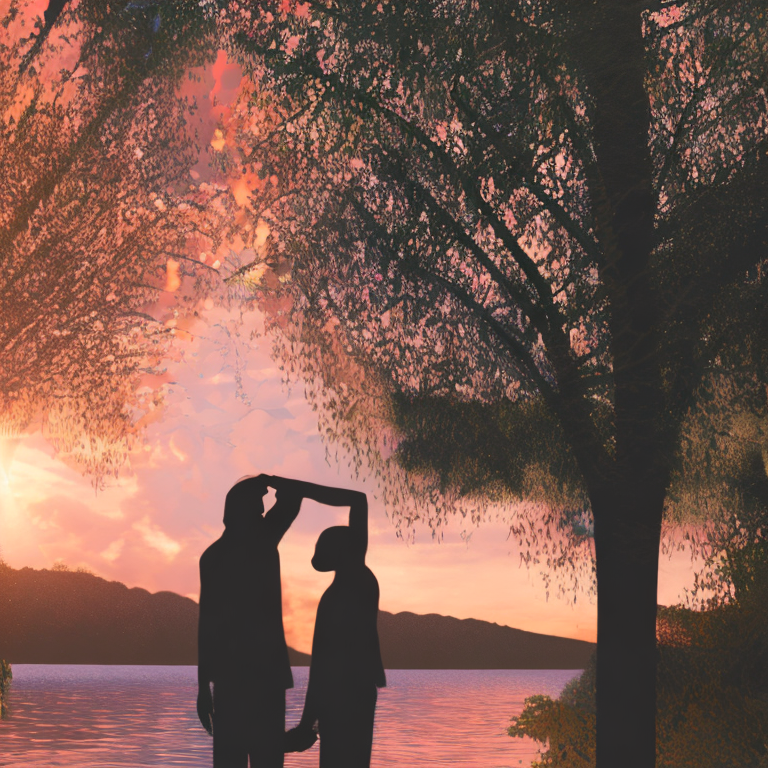

In [26]:
#Image generation

image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype= torch.float16,
    USE_SAFETENSORS=True,
    variants="fp16"
    ).to ("cuda")

text = "A young couple holding hands under a sunset and kissing, romantic atmosphere, detailed artwork, soft lighting"

image=image_gen(prompt=text).images[0]
image

In [30]:
from transformers import pipeline
import torch
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

# Load text-to-speech model
synthesiser = pipeline("text-to-audio", model="microsoft/speecht5_tts", device="cuda")

# Load speaker embeddings dataset
embedding_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

# Ensure index is within range
assert 7306 < len(embedding_dataset), "Index out of range!"

# Extract speaker embedding
speaker_embedding = torch.tensor(embedding_dataset[7306]["xvector"]).unsqueeze(0)

# Generate speech with speaker embeddings
speech = synthesiser(
    "The sun rises over the mountains, painting the sky with shades of gold and pink. A gentle breeze whispers through the trees, welcoming a new day.",
    forward_params={"speaker_embeddings": speaker_embedding}
)

# Save generated speech
sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])

# Play audio
Audio("speech.wav")


Device set to use cuda
